# Часть I: О теореме Байеса

1. Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


**Ответ:**

Пусть $X$ - подсудимый убица (виновен), $ \overline X$ - подсудимый не убийца, $A$ - у подсудимого группа крови с места преступления (подсудимый имеет редкую группу крови), $ A \in B $ - группа крови принадлежит подсудимому

- Нам известно:
1. $P(A \in B) = 1$   у подсудимого такая же группа крови, как и на месте преступления
2. $P(A) = 0.01 $
3. $P(A|X) = 1$ 

- Прокурор оценил: 
1. $P(A |  \overline X) = 0.01$ 
2. $P(A |  X) = 1 -  P(A |  \overline X) = 0.99 $ 

Ему надо было оценить вероятность:
$$P(X|A) = \frac {P(X) * P(A|X)}{P(A)} \qquad (1)$$   

Ошибка прокурора в том, что оценил вероятность $P(A|\overline X)$, посчитав, что она равна $P(A)$. А ему надо было оценить (1). Из (1) получается, что $P(X|A) = 100 \times (P(X) \times P(A|X)) \quad = \quad 100 \times 1 \times P(X) $. 


**То есть апостериорная  информация в 100 раз больше априорной.**

#################################

2. Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

**Ответ:**

Адвокат оценил, что случайный человек с редкой группой крови убийца:

- $P(X|A) = 0.0001$, однако, он принял $P(X|A) = P(A) / 100 $, что непонятно откуда. 


Ему надо было оценить вероятность что он невиновен, при условии, что у него редкая группа крови:

$$P(\overline X|A) = \frac {P( \overline X) * P(A| \overline X)}{P(A)} \qquad (2)$$   

из (2):

$P(\overline X|A) = \frac {P( \overline X) * P(A| \overline X)}{P(A)} \quad $ = $\quad1 - P(X) / P(A) \qquad$   (из полной вероятности), 

тогда, если P(X) = 0.0001, то $P(\overline X|A) = 0.9$

3. Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.

Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).

Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Решение:**

A - человек болен

P(A) = 0.01

B - тест положительный

P(B|A) = 0.95

$P(B|\overline A) = 0.05$

$P(A|B) = \frac{P(A) P(B|A)}{P(B)} = \frac{P(A) P(B|A)}{P(B|A)*P(A) + P(B|\overline A)P(\overline A)} = 0.16$

Рассмотрим 2 крайних случая:

1. Понизим $P(B|\overline A) = 0$
2. Понизим $P(B|A) = 1$

**1 случай**

$P(A) = 0.01$ - вероятность болезни

Пусть 

$P(B|\overline A) = 0 $

$P(B|A) = 0.95$

$P(B|\hat{A}) = 0$

**2 случай**

$P(B|A) = 1$

Тогда:

$P(A|B) = \frac{P(B|A)P(A)}{P(B)} = \frac{P(B|A)P(A)}{P(B|A)P(A) + P(B|\hat{A})P(\hat{A})} = \frac{1*0.01}{1*0.01+0.05*0.99} = \frac{0.01}{0.0595} \approx 16.8\% $

$P(A|\hat{B}) = \frac{P(\hat{B}|A)P(A)}{P(\hat{B})} = \frac{(1-P(B|A))P(A)}{1 - (P(B|A)P(A) + P(B|\hat{A})P(\hat{A}))} = \frac{0*0.01}{1-0.595} = 0 $

In [9]:
d=0.01
EPS=1e-9

def desease_prob(d,FP,FN,t):
    if t==True:
        return (1 - FN) * d / ((1 - FN) * d + FP * (1 - d))
    else:
        return FN * d / (FN * d + (1 - FP) * (1 - d))

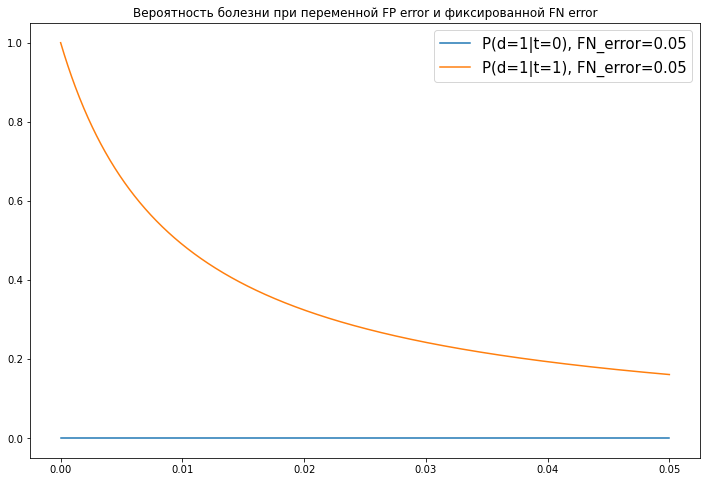

In [10]:
FP = np.linspace(0, 0.05, 1000)
FN = np.linspace(0, 0.05, 1000)

plt.figure(figsize=(12,8))
plt.title('Вероятность болезни при переменной FP error и фиксированной FN error')
plt.plot(FP, desease_prob(d,FP, 0.05, t=False), label='P(d=1|t=0), FN_error=0.05')
plt.plot(FP, desease_prob(d,FP, 0.05, t=True), label='P(d=1|t=1), FN_error=0.05')
      
plt.legend(fontsize=15)

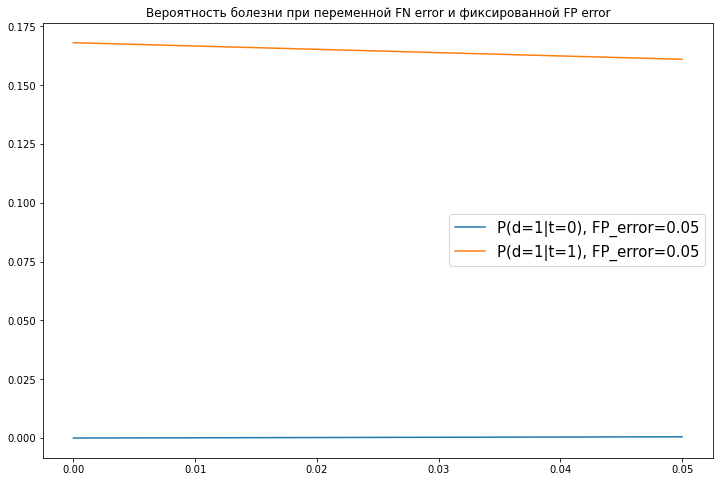

In [13]:
plt.figure(figsize=(12,8))
plt.title('Вероятность болезни при переменной FN error и фиксированной FP error')

plt.plot(FN, desease_prob(d,0.05, FN,  t=False), label='P(d=1|t=0), FP_error=0.05') 
plt.plot(FN, desease_prob(d,0.05, FN,  t=True), label='P(d=1|t=1), FP_error=0.05') 
      
plt.legend(fontsize=15)

**ВЫВОД**




Видно, что небольшие изменения FP в низких диапазонах (когда FP в районе 0.01 - 0.05) очень сильно влияют на апостериорную вероятность болезни после положительного теста. Конечно, итоговое решение, на чем сконцентрироваться, сильно зависит от соотношения стоимостей каждой ошибки, но правильным вариантом снижения является - FP 

# Часть 2.  О линейной регрессии

Часть II: О линейной регрессии


In [229]:
import pandas as pd
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression, Ridge
from scipy.stats import multivariate_normal

In [101]:
# data = pd.read_csv('owid-covid-data.csv')
# data = data[(data['date'] >= '2020-03-03') & (data['location'] == 'Russia')]

TRAIN_DAYS = 50
DATE_START = datetime(2020, 3, 3)
DATE_END = DATE_START + timedelta(days=TRAIN_DAYS)

data = pd.read_csv('hw1-covid-data.csv', index_col=0)
data = data.reset_index(drop=True)
data = data[(data['location'] == 'Russia')]
data = data[(data['date'] >= datetime.strftime(DATE_START, '%Y-%m-%d')) &
            (data['date'] <= datetime.strftime(DATE_END, '%Y-%m-%d'))]
data.shape

(51, 59)

In [102]:
data.head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,RUS,Europe,Russia,2020-03-03,3.0,0.0,0.143,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


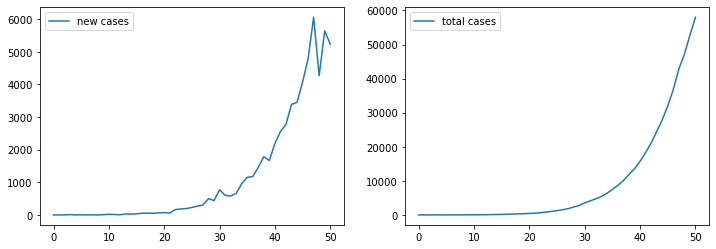

In [93]:
_, (a, b) = plt.subplots(1,2, figsize=(12,4))
a.plot(data['new_cases'], label='new cases')
b.plot(data['total_cases'], label = 'total cases')
a.legend()
b.legend()

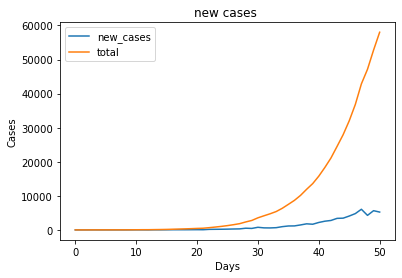

In [94]:
plt.plot(data['new_cases'], label='new_cases')
plt.plot(data['total_cases'], label='total')

plt.title('new cases ')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.legend()
plt.show()

In [103]:
data['date'] = data['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
data['date'] = data['date'].apply(lambda x: ((x - DATE_START)/timedelta(1)))
data['date'] = data['date'].astype(int)

### 2.a Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.


In [112]:
log_new_cases = np.log(data.new_cases + 1)
log_total_cases = np.log(data.total_cases)

lr_total_exp = LinearRegression()
lr_total_exp.fit(np.array(data['date']).reshape(-1, 1), log_total_cases)

lr_new_exp = LinearRegression()
lr_new_exp.fit(np.array(data['date']).reshape(-1, 1), log_new_cases)
coefs = [lr_new_exp.coef_, lr_total_exp.coef_]
inters = [lr_new_exp.intercept_, lr_total_exp.intercept_]

/Users/artem.karablinov/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


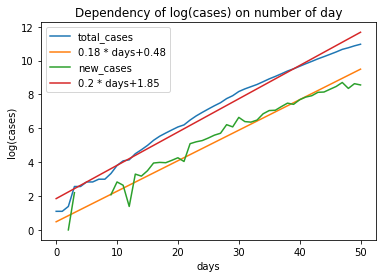

In [127]:
for i, target in enumerate(['total_cases', 'new_cases']):
    plt.plot(data['date'], 
             np.log(data[target]),
             label=target)
    
    plt.plot(data['date'], 
             coefs[i] * data['date'] + inters[i], 
             label=f'{round(coefs[i][0], 2)} * days+{round(inters[i], 2)}')
    
plt.xlabel('days')
plt.ylabel('log(cases)')
plt.title('Dependency of log(cases) on number of day')
plt.legend()
plt.show()

В конце ошибка начинает расти

### 2.b Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

In [300]:
def calc_posterior(x, y, nu_prior, sigma_prior, noise_variance):
    
    sigma = np.linalg.inv(np.linalg.inv(sigma_prior) + np.matmul(np.transpose(x), x) / noise_variance)
    nu = np.matmul(sigma, 
                   np.matmul(np.linalg.inv(sigma_prior),nu_prior) + 
                   np.matmul(np.transpose(x), np.array(y)) / noise_variance)
    return nu, sigma

In [301]:
x_train = np.array(data['date']).reshape(-1, 1)

In [302]:
nu_prior = np.array([0, 0])
sigma_prior = np.array([[1,0],[0,1]])

noise_variance = np.sum(np.power(log_total_cases - lr_total_exp.predict(np.array(data['date']).reshape(-1, 1)), 2)) / 50
print('noise var:', noise_variance)



nu_posterior, sigma_posterior = calc_posterior(np.array([[1, i] for i in range(51)]), 
                                               log_total_cases, 
                                               nu_prior, 
                                               sigma_prior, 
                                               noise_variance)

noise var: 0.13270293786761983


In [303]:
print('nu:', nu_posterior)
print('sigma:', sigma_posterior)

nu: [1.83063941 0.19710264]
sigma: [[ 1.00066062e-02 -2.97225009e-04]
 [-2.97225009e-04  1.19199358e-05]]


In [304]:
def plot_heatmap(nu, sigma):
    x_min = nu[0] - 4*sigma[0][0]**0.5
    x_max = nu[0] + 4*sigma[0][0]**0.5
    y_min = nu[1] - 4*sigma[1][1]**0.5
    y_max = nu[1] + 4*sigma[1][1]**0.5
    N = 500
    X = np.linspace(x_min, x_max, N)
    Y = np.linspace(y_min, y_max, N)
    X, Y = np.meshgrid(X, Y)
    
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y
    plt.figure(figsize=(8,4))
    plt.xlim((x_min, x_max))
    plt.ylim((y_min, y_max))
    plt.pcolormesh(X, Y, multivariate_normal.pdf(pos,mean=nu, cov=sigma), cmap=plt.cm.jet)
    plt.show()

<ipython-input-304-1d37abf36bb0>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, multivariate_normal.pdf(pos,mean=nu, cov=sigma), cmap=plt.cm.jet)


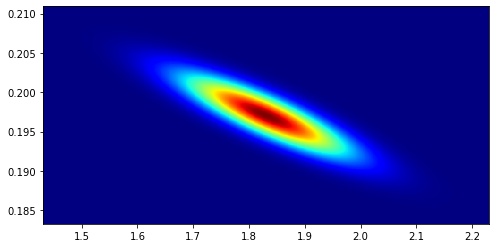

In [305]:
plot_heatmap(nu_posterior, sigma_posterior)

### 2.c Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).


In [306]:
to_may = (datetime(2020,5,1) - datetime(2020,3,3)).days
to_jun = (datetime(2020,6,1) - datetime(2020,3,3)).days
to_sep = (datetime(2020,9,1) - datetime(2020,3,3)).days

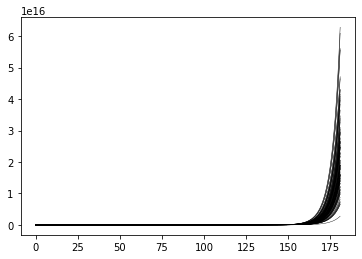

In [307]:
cases = np.zeros(3)
n_samples=100

for i in range(n_samples):
    w = np.random.multivariate_normal(nu_posterior, sigma_posterior)
    cases[0] += np.exp(w[0] + w[1] * to_may) / n_samples
    cases[1] += np.exp(w[0] + w[1] * to_jun) / n_samples
    cases[2] += np.exp(w[0] + w[1] * to_sep) / n_samples
    plt.plot(range(to_sep), [np.e**(w[0]+w[1]*i) for i in range(to_sep)], 'k-', lw=.4)
plt.show()

In [308]:
print("Случаев к 1 мая: ", int(cases[0]))
print("Случаев к 1 июня: ", int(cases[1]))
print("Случаев к 1 сентября: ", int(cases[2]))

Случаев к 1 мая:  706068
Случаев к 1 июня:  324850872
Случаев к 1 сентября:  27672897927018424


К 1 сентябрю будет почти 3 квадриллиона больных!!!! 

**Вывод:** Моделирование экспонентой нам не очень подходит

##  3

Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана.

$$ F(x) = (1/2) \pi \int_{-\inf}^{x}{\exp^{-t^2/2}dt}$$

### 3а. Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

Напрямую мы не можем обучать такую функцию через линейную регрессию, но можем обучать производную - прирост новых заболевших каждый день. $F'(x)=e^{ax^2+bx+c}$. (далее прологарифмируем)

In [309]:
# приведение предсказаний к общему числу зараженных
def to_total(preds):
    return 2 + np.cumsum(np.exp(preds), axis=0)

In [310]:
TRAIN_DAYS = 50
def create_array_2(days_amount):
    return np.array([[1, i, i**2] for i in range(days_amount)])

x_train_2 = create_array_2(TRAIN_DAYS + 1)

log_new_cases = [np.log(x) if x>0 else np.log(1) for x in data['new_cases'].values]

model2 = Ridge()
model2.fit(x_train_2, log_new_cases)
print(model2.coef_)



total_predicted = []
cur_total = 0
for i in range(180):
    cur_predicted = np.e**(model2.predict([[1,i,i**2]])[0])
    cur_total += cur_predicted
    total_predicted.append(cur_total)

[ 0.          0.27731044 -0.00187521]


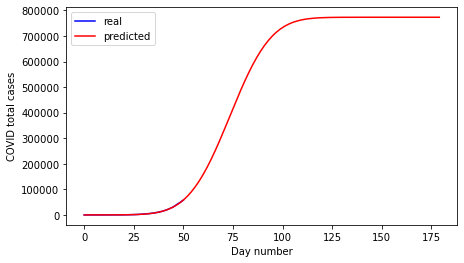

In [312]:
plt.figure(figsize=(7,4))
plt.plot(range(51), data['total_cases'], color='b', label='real')
plt.plot(range(180), total_predicted, color='r', label='predicted')
plt.xlabel("Day number")
plt.ylabel("COVID total cases")
plt.legend()
plt.show()

### 3b

In [273]:
nu_prior_2 = np.array([0, 0, 0])
sigma_prior_2 = np.eye(3,3)

noise_variance_2 = np.sum(np.power(log_new_cases - model2.predict(x_train_2), 2)) / 50
print('noise var:', noise_variance)



nu_posterior, sigma_posterior = calc_posterior(x_train_2, 
                                               log_new_cases, 
                                               nu_prior_2, 
                                               sigma_prior_2, 
                                               noise_variance_2)

noise var: 0.24030791723014278


<ipython-input-189-1d37abf36bb0>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, multivariate_normal.pdf(pos,mean=nu, cov=sigma), cmap=plt.cm.jet)


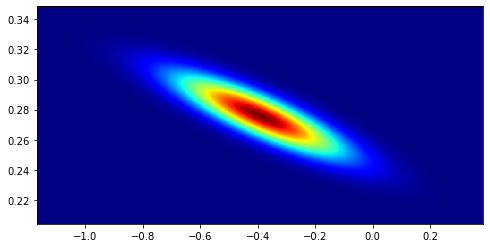

In [274]:
plot_heatmap(nu_posterior[:2], sigma_posterior[:2,:2])

In [288]:
def sample_predictions(x, nu, sigma, n=100):
    w = np.random.multivariate_normal(nu, sigma, n)
    res = np.zeros((n, x.shape[0]))
    for i, w_cur in enumerate(w):
        res[i,:]= np.exp(np.matmul(x, w_cur))
    return res

def plot_dist(x, y, nu, sigma, plot_variance=True):
    plt.figure(figsize=(14,8))
    plt.plot(range(len(x)), np.exp(np.matmul(x, nu)), color='red')
    if plot_variance:
        plt.fill_between(range(len(x)), np.mean(y, axis=0)+np.std(y, axis=0), np.mean(y, axis=0)-np.std(y, axis=0))

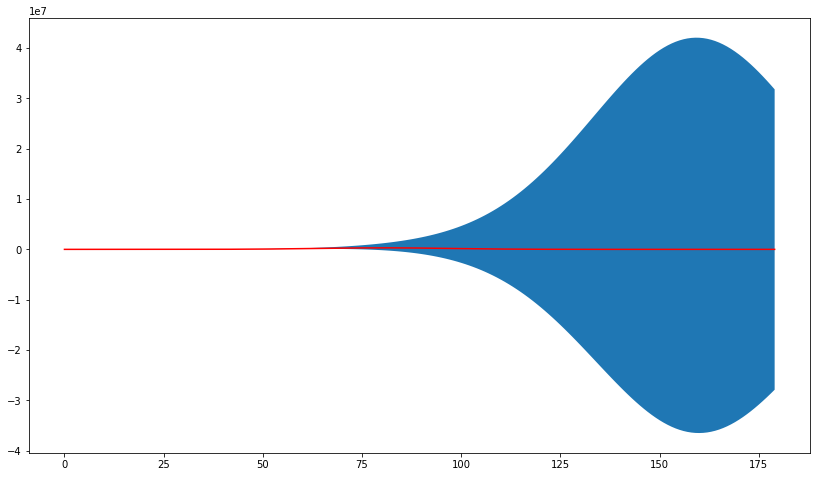

In [292]:
y_2 = sample_predictions(create_array_2(180), nu_posterior_2, sigma_posterior_2, n=500)
plot_dist(create_array_2(180), y_2, nu_posterior_2, sigma_posterior_2)

In [296]:
percent=10
print("Оптимистичный план:")
print("Случаев к 1 мая: ", int(np.sum(np.percentile(y_2[:, :to_may], percent, axis=0))))
print("Случаев к 1 июня: ", int(np.sum(np.percentile(y_2[:, :to_jun], percent, axis=0))))
print("Случаев к 1 сентября: ", int(np.sum(np.percentile(y_2[:, :to_sep], percent, axis=0))))

Оптимистичный план:
Случаев болезни 1 мая:  899056
Случаев болезни 1 июня:  3603664
Случаев болезни 1 сентября:  3978258


In [297]:
percent=90
print("Пессимистичный план:")
print("Случаев к 1 мая: ", int(np.sum(np.percentile(y_2[:,:to_may],percent, axis=0))))
print("Случаев к 1 июня: ", int(np.sum(np.percentile(y_2[:,:to_jun],percent, axis=0))))
print("Случаев к 1 сентября: ", int(np.sum(np.percentile(y_2[:,:to_sep],percent, axis=0))))

Пессимистичный план:
Случаев болезни 1 мая:  1644139
Случаев болезни 1 июня:  26958025
Случаев болезни 1 сентября:  87509250


Факультативную часть уже не в силах сделать :(

Интересное, но объемное и сложное дз. Пришлось попотеть. 
